# CHALLENGE ONE

***Desafio Telecom X***

O desafio Telecom X é uma oportunidade para aplicação das habilidades essenciais de análise de dados em um cenário de negócios real.

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

# 📌 Extração

In [3]:
import pandas as pd

dados = pd.read_json('/content/TelecomX_Data.json')


In [4]:
customer_normalized = pd.json_normalize(dados['customer'])

phone_normalized = pd.json_normalize(dados['phone'])

internet_normalized = pd.json_normalize(dados['internet'])

account_normalized = pd.json_normalize(dados['account'])

normalized_df = pd.concat([
    dados[['customerID', 'Churn']],
    customer_normalized,
    phone_normalized,
    internet_normalized,
    account_normalized
], axis=1)


In [5]:
normalized_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# 🔧 Transformação

In [6]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
# Procurando espaços em branco

df_strings = normalized_df.select_dtypes(include='object')

espacos_vazios_por_coluna = (df_strings.apply(lambda col: col.str.strip() == '')).sum()

print("Valores como string vazia ou só espaços por coluna:")
print(espacos_vazios_por_coluna)

Valores como string vazia ou só espaços por coluna:
customerID            0
Churn               224
gender                0
Partner               0
Dependents            0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Total        11
dtype: int64


In [9]:
# Substituir espaços por NaN

import numpy as np
normalized_df = normalized_df.replace(r'^\s*$', np.nan, regex=True)

print("Valores nulos:\n\n",normalized_df.isnull().sum())

Valores nulos:

 customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [10]:
'''
Tratamento de Dados Ausentes na Coluna Churn:
Durante a etapa de pré-processamento, 224 registros (aproximadamente 3,08% do total de clientes) foram identificados com informações ausentes ou inválidas na coluna Churn.
Esses dados foram removidos da análise. É importante notar que a ausência dessas informações pode impactar ligeiramente os resultados, mas a remoção foi necessária para
garantir a consistência e a confiabilidade do modelo analítico e dos dados de treinamento.

'''

# Removendo as linhas com informação faltante

normalized_df = normalized_df.dropna(subset=['Churn'])

print("Valores nulos:\n\n",normalized_df.isnull().sum())

Valores nulos:

 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [11]:
nulos_charges = normalized_df[normalized_df['Charges.Total'].isnull()]
print(nulos_charges[['customerID', 'tenure', 'Charges.Monthly', 'Churn']])

      customerID  tenure  Charges.Monthly Churn
975   1371-DWPAZ       0            56.05    No
1775  2520-SGTTA       0            20.00    No
1955  2775-SEFEE       0            61.90    No
2075  2923-ARZLG       0            19.70    No
2232  3115-CZMZD       0            20.25    No
2308  3213-VVOLG       0            25.35    No
2930  4075-WKNIU       0            73.35    No
3134  4367-NUYAO       0            25.75    No
3203  4472-LVYGI       0            52.55    No
4169  5709-LVOEQ       0            80.85    No
5599  7644-OMVMY       0            19.85    No


In [12]:
'''
Na análise acima foi possível observar que os 11 valores não preenchidos na coluna 'Charges.Total' provavelmente se deve ao fato de serem clientes novos,
já que continuam ativos na cluna 'Churn', mas possuem zero meses de contrato. Portanto, ainda não foi emitida nenhuma cobrança completa. Para não interferir na análise,
usaremos apenas os clientes que já completaram pelo menos 1 mês e tiveram a chance de cancelar.

'''

df_analise = normalized_df[normalized_df['tenure'] > 0]

In [ ]:
'''

# Contar quantos valores por coluna são apenas espaços ou vazios
espacos_vazios = (normalized_df.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum()

print("Valores como string vazia ou só espaços por coluna:")
print(espacos_vazios[espacos_vazios > 0])

'''


In [ ]:
'''

possiveis_nulos = ["NA", "N/A", "null", "NULL", "?", "-", "--"]

mascara_possiveis_nulos = normalized_df.applymap(lambda x: isinstance(x, str) and x.strip().upper() in [p.upper() for p in possiveis_nulos])

print("Valores suspeitos encontrados por coluna:")
print(mascara_possiveis_nulos.sum()[mascara_possiveis_nulos.sum() > 0])

'''


In [13]:
for col in df_analise.columns:
    print(f"\nColuna: {col}")
    print(df_analise[col].value_counts(dropna=False).head())


Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
Name: count, dtype: int64

Coluna: Churn
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Coluna: gender
gender
Male      3549
Female    3483
Name: count, dtype: int64

Coluna: SeniorCitizen
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Coluna: Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Coluna: tenure
tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Coluna: OnlineSecurity
O

In [14]:
# Cópia de segurança
df = df_analise.copy()

In [15]:
# Removendo redundâncias

cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_internet:
    df[col] = df[col].replace('No internet service', 'No')

In [16]:
# Verificando se há IDs duplicados
duplicados = df[df['customerID'].duplicated(keep=False)]

if duplicados.empty:
    print("Nenhum ID duplicado encontrado.")
else:
    print(f"Foram encontrados {duplicados.shape[0]} registros com ID duplicado.\n")
    print(duplicados.sort_values(by='customerID'))


Nenhum ID duplicado encontrado.


In [18]:
'''
 Para um melhor resultado com um futuro modelo de machine learning, optamos por substituir os valores categóricos 'Yes' e 'No' por valores binários numéricos.

 '''

pd.set_option('future.no_silent_downcasting', True)

mapeamento_binario = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}

colunas_para_converter = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling'
    ]

for col in colunas_para_converter:
    df.loc[:, col] = df[col].replace(mapeamento_binario)


In [19]:
# Alterando o tipo nos valores binários
colunas_para_converter
df[colunas_para_converter] = df[colunas_para_converter].astype(np.int64)

In [20]:
# Corrigindo o tipo da coluna Charges.Total
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [21]:
# Foi solicitada a criação da coluna "Contas_Diarias", utilizando o faturamento mensal para calcular o valor diário, com o objetico de proporcionar uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

df['DailyAccounts'] = df['Charges.Monthly'] / 30

print(df[['Charges.Monthly', 'tenure', 'DailyAccounts']].head())

   Charges.Monthly  tenure  DailyAccounts
0             65.6       9       2.186667
1             59.9       9       1.996667
2             73.9       4       2.463333
3             98.0      13       3.266667
4             83.9       3       2.796667


In [22]:
# Nomes das colunas
print(df.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'DailyAccounts'],
      dtype='object')


In [24]:
# Traduzindo os nomes das colunas para facilitar a compreensão da análise

novos_nomes = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'gender': 'Genero_Biolgico',
    'SeniorCitizen': 'Cidadao_Senior',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguraca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Online',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total',
    'DailyAccounts': 'Custo_Diario'
}

df.rename(columns=novos_nomes, inplace=True)

print(df.columns)

Index(['ID_Cliente', 'Cancelamento', 'Genero_Biolgico', 'Cidadao_Senior',
       'Parceiro', 'Dependentes', 'Meses_Contrato', 'Servico_Telefone',
       'Multiplas_Linhas', 'Servico_Internet', 'Seguraca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total',
       'Custo_Diario'],
      dtype='object')


In [25]:
mapeamento_genero = {'Female': 'Feminino', 'Male': 'Masculino'}

df['Genero_Biolgico'] = df['Genero_Biolgico'].replace(mapeamento_genero)

print(df['Genero_Biolgico'].value_counts())

Genero_Biolgico
Masculino    3549
Feminino     3483
Name: count, dtype: int64


In [26]:
mapeamento_linhas = {'No': 'Nao', 'Yes': 'Sim', 'No phone service': 'Sem servico de telefone'}

df['Multiplas_Linhas'] = df['Multiplas_Linhas'].replace(mapeamento_linhas)

print(df['Multiplas_Linhas'].value_counts())

Multiplas_Linhas
Nao                        3385
Sim                        2967
Sem servico de telefone     680
Name: count, dtype: int64


In [27]:
mapeamento_internet = {'No': 'Nao', 'Fiber optic' : 'Fibra otica', 'DSL': 'DSL'}

df['Servico_Internet'] = df['Servico_Internet'].replace(mapeamento_internet)

print(df['Servico_Internet'].value_counts())

Servico_Internet
Fibra otica    3096
DSL            2416
Nao            1520
Name: count, dtype: int64


In [28]:
mapeamento_contrato = {'Month-to-month' : 'Mensal', 'One year': 'Um ano', 'Two year': 'Dois anos'}

df['Tipo_Contrato'] = df['Tipo_Contrato'].replace(mapeamento_contrato)

print(df['Tipo_Contrato'].value_counts())

Tipo_Contrato
Mensal       3875
Dois anos    1685
Um ano       1472
Name: count, dtype: int64


In [58]:
mapeamento_pagamento = {'Electronic check' : 'Cheque eletrônico', 'Mailed check': 'Cheque por correio', 'Bank transfer (automatic)': 'Transferencia bancaria (automatica)', 'Credit card (automatic)': 'Cartao de credito (automatica)'}

df['Metodo_Pagamento'] = df['Metodo_Pagamento'].replace(mapeamento_pagamento)

print(df['Metodo_Pagamento'].value_counts())

Metodo_Pagamento
Cheque eletrônico                      2365
Cheque por correio                     1604
Transferencia bancaria (automatica)    1542
Cartao de credito (automatica)         1521
Name: count, dtype: int64


In [53]:
pip install pandas matplotlib seaborn

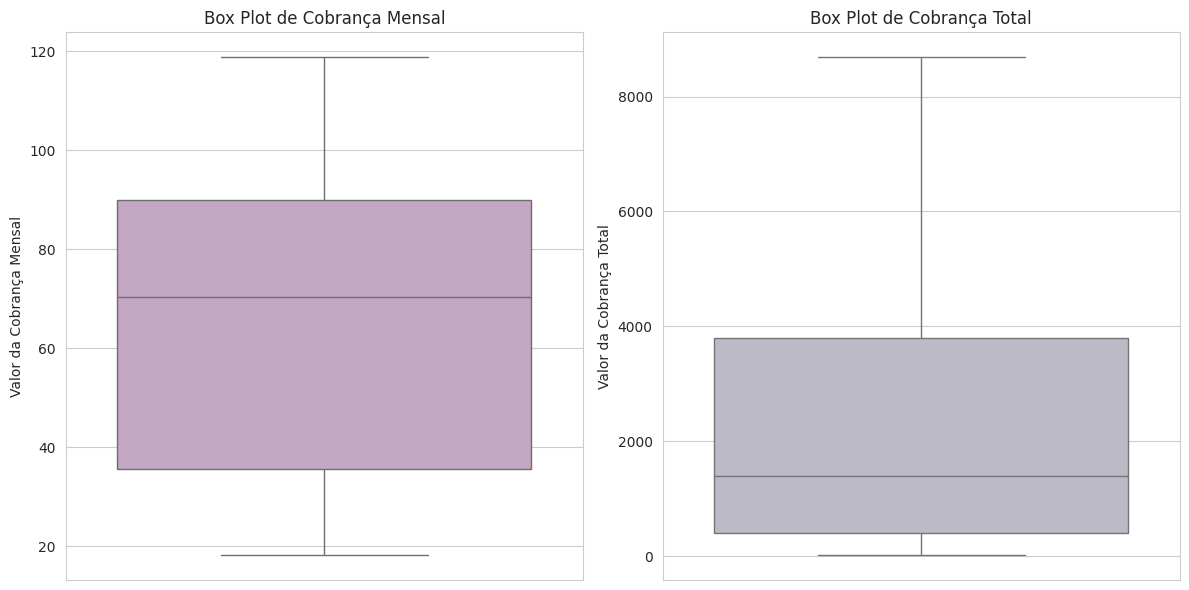

In [66]:
# Procurando outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(y=df['Cobranca_Mensal'], ax=axes[0], color='#C8A2C8')
axes[0].set_title('Box Plot de Cobrança Mensal')
axes[0].set_ylabel('Valor da Cobrança Mensal')

sns.boxplot(y=df['Cobranca_Total'], ax=axes[1], color='#BCB8C9')
axes[1].set_title('Box Plot de Cobrança Total')
axes[1].set_ylabel('Valor da Cobrança Total')

plt.tight_layout()

plt.show()

# 📊 Carga e análise

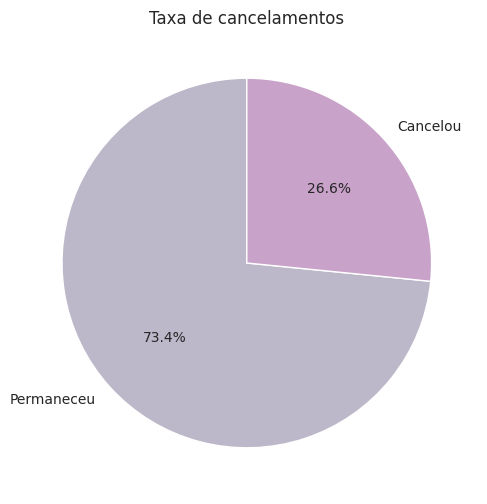

In [60]:
# Visualizando proporção de cancelamentos

import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de churn
churn_counts = df['Cancelamento'].value_counts()
labels = ['Permaneceu', 'Cancelou']  # assumindo que 0 = ficou e 1 = cancelou

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['#BCB8C9', '#C8A2C8'], startangle=90)
plt.title('Taxa de cancelamentos')
plt.show()


In [61]:
# Estatísticas descritivas para colunas numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Cancelamento,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
Cidadao_Senior,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
Parceiro,7032.0,0.482509,0.499729,0.000000,0.00000,0.000,1.000000,1.000000
Dependentes,7032.0,0.298493,0.457629,0.000000,0.00000,0.000,1.000000,1.000000
Meses_Contrato,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
Servico_Telefone,7032.0,0.903299,0.295571,0.000000,1.00000,1.000,1.000000,1.000000
Seguraca_Online,7032.0,0.286547,0.452180,0.000000,0.00000,0.000,1.000000,1.000000
Backup_Online,7032.0,0.344852,0.475354,0.000000,0.00000,0.000,1.000000,1.000000
Protecao_Dispositivo,7032.0,0.343857,0.475028,0.000000,0.00000,0.000,1.000000,1.000000
Suporte_Tecnico,7032.0,0.290102,0.453842,0.000000,0.00000,0.000,1.000000,1.000000


In [62]:
print(df.describe(include='all'))

        ID_Cliente  Cancelamento Genero_Biolgico  Cidadao_Senior     Parceiro  \
count         7032   7032.000000            7032     7032.000000  7032.000000   
unique        7032           NaN               2             NaN          NaN   
top     9995-HOTOH           NaN       Masculino             NaN          NaN   
freq             1           NaN            3549             NaN          NaN   
mean           NaN      0.265785             NaN        0.162400     0.482509   
std            NaN      0.441782             NaN        0.368844     0.499729   
min            NaN      0.000000             NaN        0.000000     0.000000   
25%            NaN      0.000000             NaN        0.000000     0.000000   
50%            NaN      0.000000             NaN        0.000000     0.000000   
75%            NaN      1.000000             NaN        0.000000     1.000000   
max            NaN      1.000000             NaN        1.000000     1.000000   

        Dependentes  Meses_

In [63]:
# Colunas numéricas
num_cols = df.select_dtypes(include=np.number)

# DataFrame com métricas
stats = pd.DataFrame({
    'Média': num_cols.mean(),
    'Mediana': num_cols.median(),
    'Moda': num_cols.mode().iloc[0],
    'Desvio Padrão': num_cols.std(),
    'Mínimo': num_cols.min(),
    'Máximo': num_cols.max(),
    '1º Quartil (Q1)': num_cols.quantile(0.25),
    '3º Quartil (Q3)': num_cols.quantile(0.75),
    'Amplitude': num_cols.max() - num_cols.min(),
    'Coef. de Variação (%)': (num_cols.std() / num_cols.mean()) * 100
})

stats


,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo,1º Quartil (Q1),3º Quartil (Q3),Amplitude,Coef. de Variação (%)
Cancelamento,0.265785,0.000,0.000000,0.441782,0.000000,1.000000,0.00000,1.000000,1.00,166.217710
Cidadao_Senior,0.162400,0.000,0.000000,0.368844,0.000000,1.000000,0.00000,0.000000,1.00,227.120051
Parceiro,0.482509,0.000,0.000000,0.499729,0.000000,1.000000,0.00000,1.000000,1.00,103.569047
Dependentes,0.298493,0.000,0.000000,0.457629,0.000000,1.000000,0.00000,1.000000,1.00,153.313437
Meses_Contrato,32.421786,29.000,1.000000,24.545260,1.000000,72.000000,9.00000,55.000000,71.00,75.706069
Servico_Telefone,0.903299,1.000,1.000000,0.295571,0.000000,1.000000,1.00000,1.000000,1.00,32.721266
Seguraca_Online,0.286547,0.000,0.000000,0.452180,0.000000,1.000000,0.00000,1.000000,1.00,157.803055
Backup_Online,0.344852,0.000,0.000000,0.475354,0.000000,1.000000,0.00000,1.000000,1.00,137.842810
Protecao_Dispositivo,0.343857,0.000,0.000000,0.475028,0.000000,1.000000,0.00000,1.000000,1.00,138.147022
Suporte_Tecnico,0.290102,0.000,0.000000,0.453842,0.000000,1.000000,0.00000,1.000000,1.00,156.441902


In [64]:
# Estatísticas para variáveis categóricas
cat_cols = df.select_dtypes(exclude=np.number)

for col in cat_cols.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')



--- ID_Cliente ---
ID_Cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64
ID_Cliente
9995-HOTOH    0.01%
0002-ORFBO    0.01%
0003-MKNFE    0.01%
0004-TLHLJ    0.01%
0011-IGKFF    0.01%
              ...  
0018-NYROU    0.01%
0017-IUDMW    0.01%
0017-DINOC    0.01%
0016-QLJIS    0.01%
0015-UOCOJ    0.01%
Name: proportion, Length: 7032, dtype: object

--- Genero_Biolgico ---
Genero_Biolgico
Masculino    3549
Feminino     3483
Name: count, dtype: int64
Genero_Biolgico
Masculino    50.47%
Feminino     49.53%
Name: proportion, dtype: object

--- Multiplas_Linhas ---
Multiplas_Linhas
Nao                        3385
Sim                        2967
Sem servico de telefone     680
Name: count, dtype: int64
Multiplas_Linhas
Nao                        48.14%
Sim                        42.19%
Sem servico de telefone     9.67%
N

In [43]:
# Análise de evasão por variáveis categóricas

categoricas = [
    'Genero_Biolgico',
    'Cidadao_Senior',
    'Parceiro',
    'Dependentes',
    'Servico_Telefone',
    'Multiplas_Linhas',
    'Servico_Internet',
    'Seguraca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Tipo_Contrato',
    'Fatura_Online',
    'Metodo_Pagamento'
]

# Calculando taxa de cancelamento
def taxa_cancelamento(df, coluna):
    return (
        df.groupby(coluna)['Cancelamento']
          .mean()
          .mul(100)
          .round(2)
          .reset_index(name='Taxa_Cancelamento (%)')
    )

resultados = {}
for col in categoricas:
    resultados[col] = taxa_cancelamento(df, col)

for col, tabela in resultados.items():
    print(f"\n--- {col} ---")
    print(tabela)



--- Genero_Biolgico ---
  Genero_Biolgico  Taxa_Cancelamento (%)
0        Feminino                  26.96
1       Masculino                  26.20

--- Cidadao_Senior ---
   Cidadao_Senior  Taxa_Cancelamento (%)
0               0                  23.65
1               1                  41.68

--- Parceiro ---
   Parceiro  Taxa_Cancelamento (%)
0         0                  32.98
1         1                  19.72

--- Dependentes ---
   Dependentes  Taxa_Cancelamento (%)
0            0                  31.28
1            1                  15.53

--- Servico_Telefone ---
   Servico_Telefone  Taxa_Cancelamento (%)
0                 0                  25.00
1                 1                  26.75

--- Multiplas_Linhas ---
          Multiplas_Linhas  Taxa_Cancelamento (%)
0                      Nao                  25.08
1  Sem servico de telefone                  25.00
2                      Sim                  28.65

--- Servico_Internet ---
  Servico_Internet  Taxa_Cancelamento (%

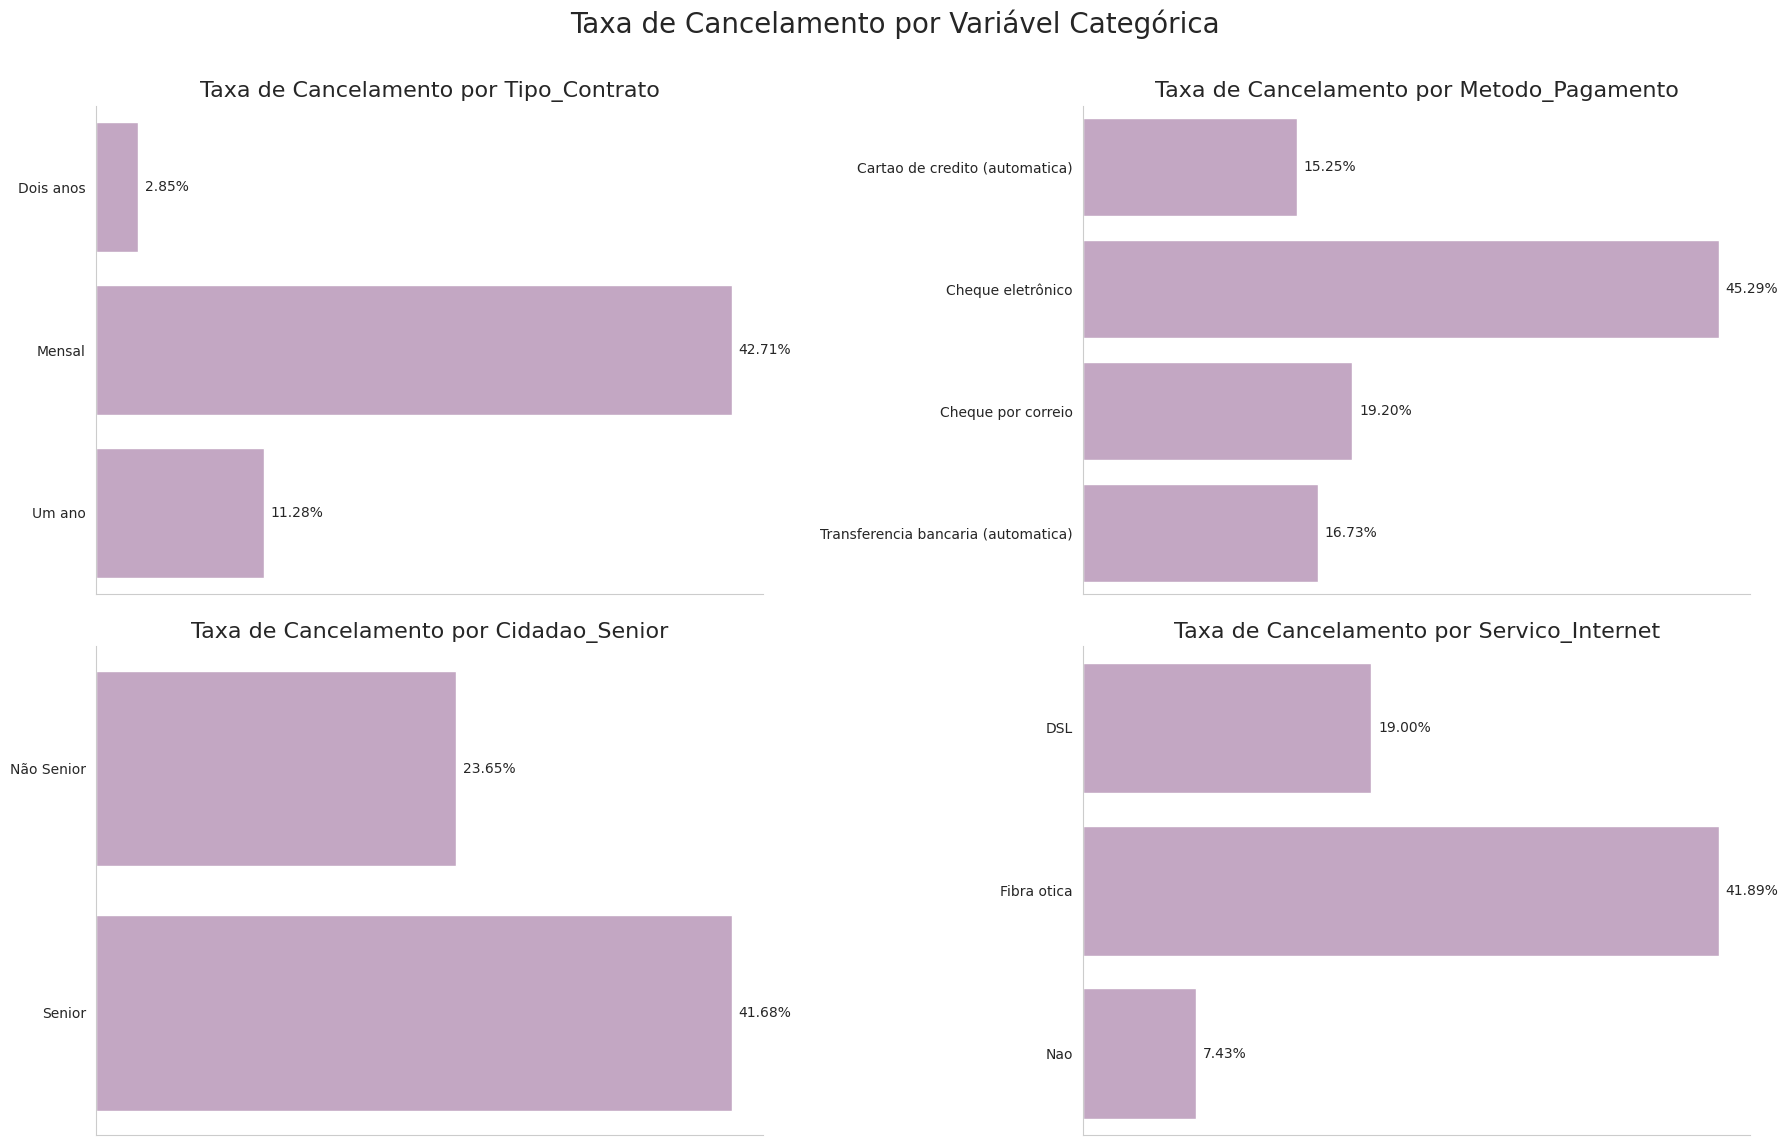

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

def taxa_cancelamento(df, coluna):
    return df.groupby(coluna)['Cancelamento'].mean().mul(100).round(2).reset_index(name='Taxa_Cancelamento (%)')

colunas = ['Tipo_Contrato', 'Metodo_Pagamento', 'Cidadao_Senior', 'Servico_Internet']

# Cor
cor_barra = '#C8A2C8'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Taxa de Cancelamento por Variável Categórica', fontsize=20, y=0.95)

for i, coluna in enumerate(colunas):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    taxa = taxa_cancelamento(df, coluna)

    if coluna == 'Cidadao_Senior':
        taxa[coluna] = taxa[coluna].replace({0: 'Não Senior', 1: 'Senior'})

    # Gráfico de barras horizontal
    sns.barplot(
        data=taxa,
        x='Taxa_Cancelamento (%)',
        y=coluna,
        ax=ax,
        color=cor_barra
    )

    # Ajustando título
    ax.set_title(f'Taxa de Cancelamento por {coluna}', fontsize=16)
    ax.set_ylabel('') # Removendo o rótulo do eixo Y

    # Rótulos
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', padding=5)

    ax.grid(False)
    ax.set_xlabel('')
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.94], w_pad=2.0, h_pad=2.0)

plt.show()

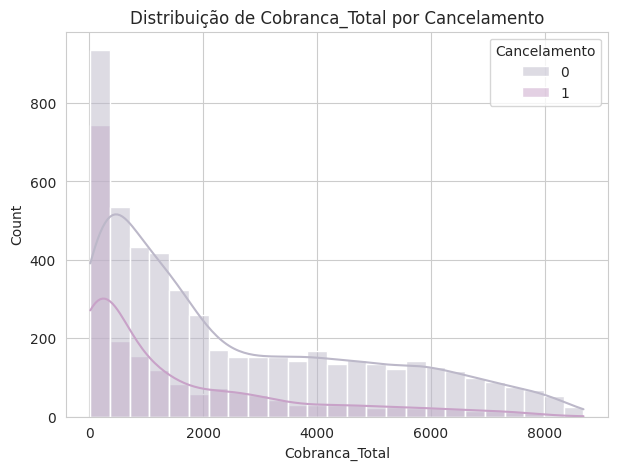

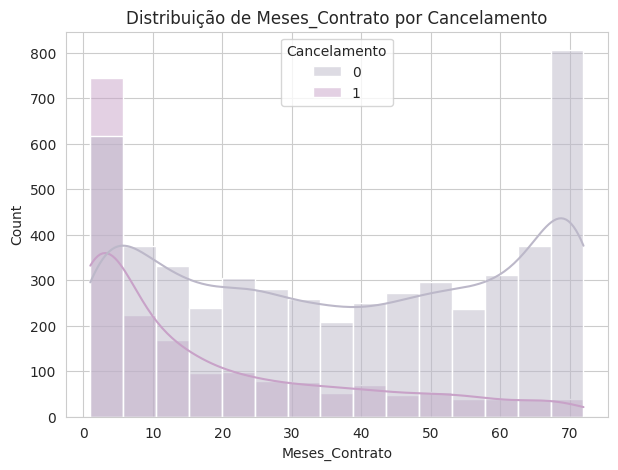

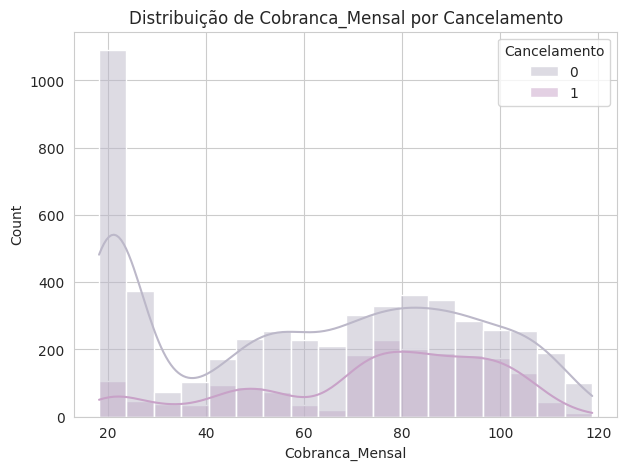

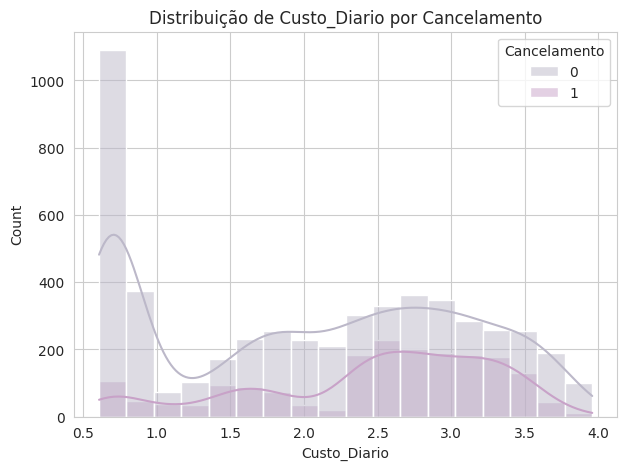

In [81]:
# Annalisando colunas numéricas
numericas = ['Cobranca_Total', 'Meses_Contrato', 'Cobranca_Mensal', 'Custo_Diario']

# Histogramas
for col in numericas:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=df, x=col, hue='Cancelamento', kde=True,
                 palette=['#BCB8C9', '#C8A2C8'], alpha=0.5)
    plt.title(f'Distribuição de {col} por Cancelamento')
    plt.show()

In [82]:
df.groupby('Cancelamento')[numericas].agg(['mean', 'median', 'std'])


Cobranca_Total                       Meses_Contrato         \
                       mean   median          std           mean median   
Cancelamento                                                              
0               2555.344141  1683.60  2329.456984      37.650010   38.0   
1               1531.796094   703.55  1890.822994      17.979133   10.0   

                        Cobranca_Mensal                   Custo_Diario  \
                    std            mean median        std         mean   
Cancelamento                                                             
0             24.076940       61.307408  64.45  31.094557     2.043580   
1             19.531123       74.441332  79.65  24.666053     2.481378   

                                  
                median       std  
Cancelamento                      
0             2.148333  1.036485  
1             2.655000  0.822202

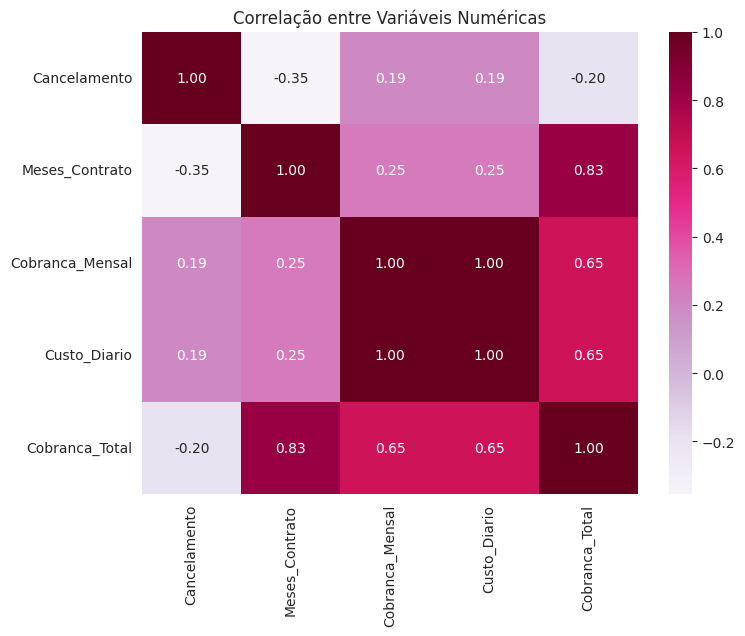

In [83]:
corr = df[['Cancelamento', 'Meses_Contrato', 'Cobranca_Mensal', 'Custo_Diario', 'Cobranca_Total']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='PuRd', fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()


In [48]:
# Análise de cancelamennto cruzando duas variáveis categóricas
pd.crosstab(df['Tipo_Contrato'], df['Metodo_Pagamento'], values=df['Cancelamento'], aggfunc='mean') * 100

Metodo_Pagamento,Cartao de credito (automatica),Cheque por correio,Electronic check,Transferencia bancaria (automatica)
Tipo_Contrato,,,,
Dois anos,2.241379,0.800000,7.738095,3.380783
Mensal,32.780847,31.578947,53.729730,34.125637
Um ano,10.301508,6.845238,18.443804,9.718670


In [84]:
import pandas as pd

# Correlação entre Custo_Diario e Cancelamento
correlacao_custo = df[['Custo_Diario', 'Cancelamento']].corr().iloc[0, 1]

print(f"A correlação entre Custo_Diario e Cancelamento é: {correlacao_custo:.2f}")

A correlação entre Custo_Diario e Cancelamento é: 0.19


In [91]:
# Cópia de segurança
df_teste = df.copy()

In [98]:
mapeamento_binario_linhas = {
    'Nao': 0,
    'Sim': 1,
    'Sem servico de telefone': 0
}

df_teste['Multiplas_Linhas'] = df_teste['Multiplas_Linhas'].replace(mapeamento_binario_linhas).astype(int)

servicos_binarios = [
    'Servico_Telefone', 'Multiplas_Linhas', 'Seguraca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes'
]

df_teste['Total_Servicos'] = df_teste[servicos_binarios].sum(axis=1)

print(df_teste['Total_Servicos'].value_counts())

Total_Servicos
1    1697
2    1186
3     965
4     921
5     906
6     674
7     395
8     208
0      80
Name: count, dtype: int64


In [99]:
# Correlação entre Total_Servicos e Cancelamento
correlacao_servicos = df_teste[['Total_Servicos', 'Cancelamento']].corr().iloc[0, 1]

print(f"A correlação entre Total_Servicos e Cancelamento é: {correlacao_servicos:.2f}")

A correlação entre Total_Servicos e Cancelamento é: -0.07


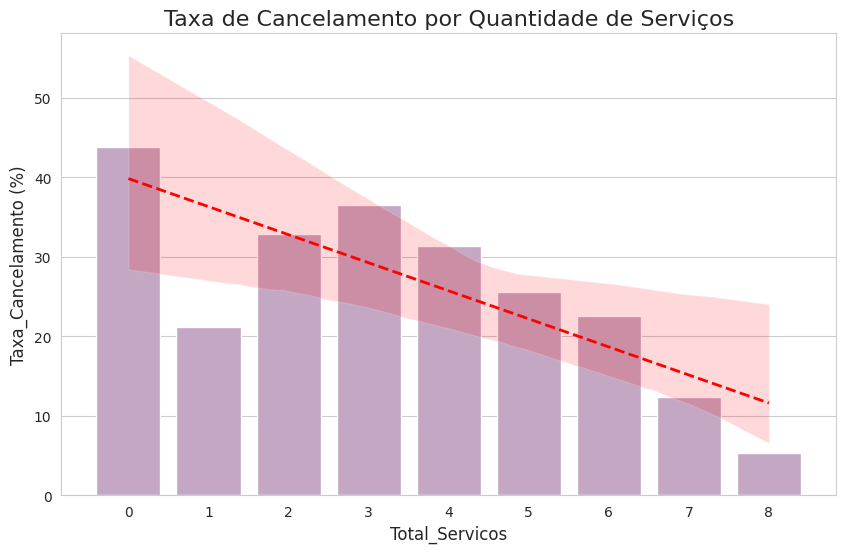

In [101]:
'''
A análise acima sugere que clientes com poucos ou nenhum serviço são o grupo de maior risco de evasão, enquanto clientes com uma ampla gama de serviços contratados são os mais leais.

'''

plt.figure(figsize=(10, 6))

# Média de cancelamento para cada número de serviços

def taxa_cancelamento(df_teste, coluna):
    return (
        df_teste.groupby(coluna)['Cancelamento']
        .mean()
        .mul(100)
        .round(2)
        .reset_index(name='Taxa_Cancelamento (%)')
    )

taxa_por_servicos = taxa_cancelamento(df_teste, 'Total_Servicos')

# Gráfico de barras
sns.barplot(
    data=taxa_por_servicos,
    x='Total_Servicos',
    y='Taxa_Cancelamento (%)',
    color='#C8A2C8'
)

plt.title('Taxa de Cancelamento por Quantidade de Serviços', fontsize=16)
plt.xlabel('Número Total de Serviços Contratados', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)

sns.regplot(
    data=taxa_por_servicos,
    x='Total_Servicos',
    y='Taxa_Cancelamento (%)',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'linewidth': 2}
)

plt.show()

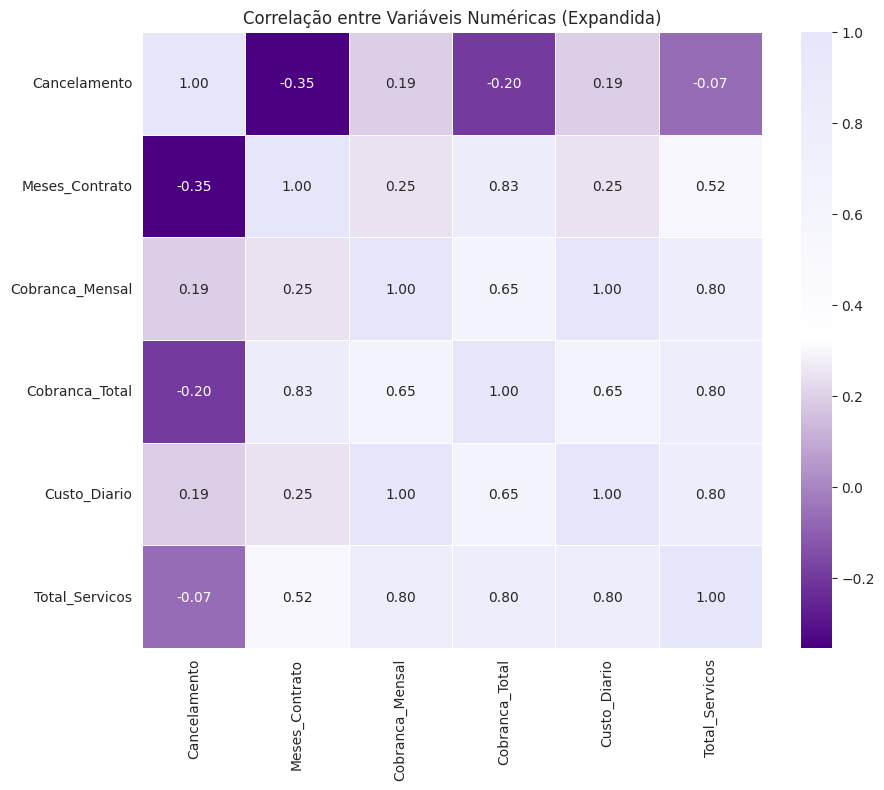

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecione as colunas relevantes
cols_corr = ['Cancelamento', 'Meses_Contrato', 'Cobranca_Mensal',
             'Cobranca_Total', 'Custo_Diario', 'Total_Servicos']

# Crie o colormap personalizado com tons de lilás
from matplotlib.colors import LinearSegmentedColormap
cmap_lilas = LinearSegmentedColormap.from_list(
    'lilas_cmap',
    ['#4b0082', '#ffffff', '#e6e6fa']
)

# Calcule a matriz de correlação
corr_expandida = df_teste[cols_corr].corr()

# Visualize o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_expandida, annot=True, cmap=cmap_lilas, fmt=".2f", linewidths=.5)
plt.title("Correlação entre Variáveis Numéricas (Expandida)")
plt.show()

# RELATÓRIO FINAL


## **Relatório de Análise de Evasão de Clientes - Telecom X**

---

Analista: Assistente de Análise de Dados

Projeto: Churn de Clientes

Data: Agosto de 2025


  1. **Introdução**

Este relatório apresenta os resultados de uma análise exploratória de dados sobre o comportamento de clientes da Telecom X, com o objetivo principal de entender os fatores que contribuem para a evasão de clientes, um problema de negócio conhecido como Churn. A empresa enfrenta um alto índice de cancelamentos e, para mitigar esse problema, é crucial identificar os padrões e características dos clientes que cancelam seus serviços.

A análise aqui descrita serve como a primeira fase do projeto "Churn de Clientes", fornecendo uma base sólida de insights para que as próximas etapas, como a construção de modelos preditivos, possam ser desenvolvidas de forma mais eficaz pela equipe de Data Science.

  2. **Limpeza e Tratamento de Dados**

A base de dados, originalmente em formato JSON, foi importada e tratada para garantir a qualidade e a confiabilidade da análise. Os principais passos realizados foram:




*   **Normalização dos Dados**: O arquivo JSON foi normalizado para criar um único DataFrame, consolidando informações sobre cliente, telefone, internet e conta.

*  **Tratamento de Valores Ausentes:**


-  Foi identificado um total de 224 registros com valores nulos na coluna Churn. Para garantir a consistência da análise, essas linhas foram removidas.

-  A coluna *Charges.Total* apresentava 11 valores nulos. Uma inspeção mais detalhada revelou que esses clientes tinham 0 meses de contrato *(tenure)*, indicando que eram clientes muito novos que ainda não haviam recebido uma fatura completa. Para evitar distorções, esses 11 clientes foram removidos da análise, garantindo que o estudo se concentrasse apenas em clientes que tiveram a chance real de cancelar após o primeiro mês.


*  **Conversão de Tipos de Dados:**

-   Valores categóricos como 'Yes' e 'No' foram convertidos para binários (1 e 0, respectivamente) para facilitar análises quantitativas e a futura modelagem preditiva.

-   A coluna *Charges.Total*, que estava como object, foi convertida para float para permitir cálculos numéricos.


*  **Enriquecimento de Dados:** Uma nova coluna, Custo_Diario, foi criada para fornecer uma visão mais granular dos gastos dos clientes, calculando a cobrança mensal dividida por 30 dias.

*  **Padronização e Tradução:** Os nomes das colunas foram traduzidos para o português e os valores categóricos foram padronizados para garantir uma leitura e interpretação mais claras (ex: Month-to-month para Mensal, Female para Feminino).

A etapa de pré-processamento garantiu que o conjunto de dados final estivesse limpo, estruturado e pronto para a análise, sem a presença de outliers que pudessem comprometer a integridade dos resultados. Conforme evidenciado pelos box plots gerados, não foram encontrados outliers nas variáveis Cobranca_Mensal e Cobranca_Total.

  3. **Análise Exploratória de Dados (EDA)**

3.1. Taxa de Cancelamento Global
A análise inicial revelou que a taxa de cancelamento geral na Telecom X é de 26,6%. Este percentual, visualizado no gráfico de pizza, estabelece a dimensão do problema e serve como ponto de referência para comparar as taxas de cancelamento em diferentes grupos de clientes.

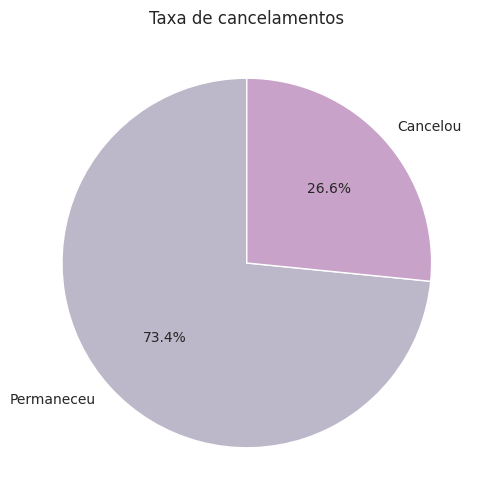


3.2. Análise de Cancelamento por Variáveis Categóricas
A segmentação dos clientes por características categóricas permitiu identificar os grupos mais vulneráveis ao churn. Os principais achados foram:


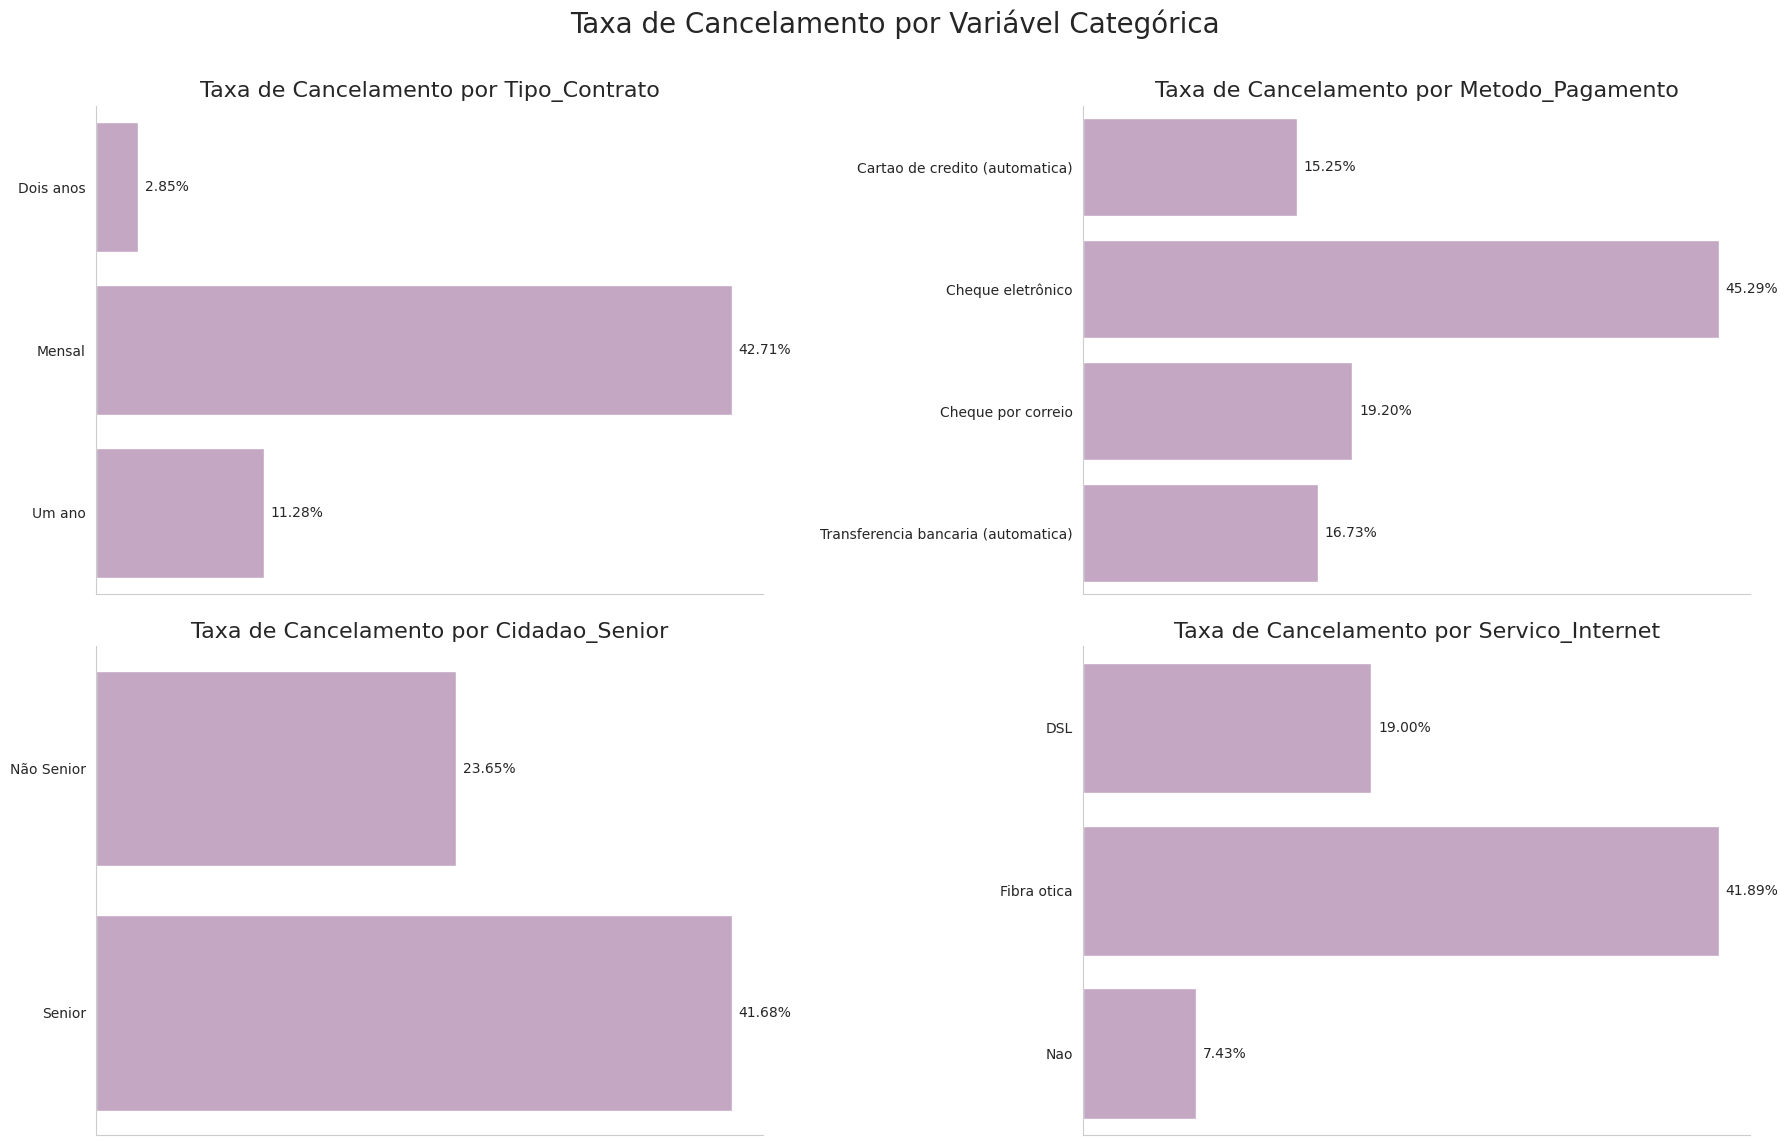



*   **Tipo de Contrato:** Este é o fator de maior impacto. Clientes com **contrato mensal** apresentam uma taxa de cancelamento alarmante de **42,71%**. Em contraste, clientes com contratos de "Um ano" e "Dois anos" têm taxas significativamente menores, de 11,28% e 2,85%, respectivamente.

*   **Método de Pagamento:** O método de pagamento **Cheque eletrônico** está fortemente associado ao cancelamento, com uma taxa de **45,29%**.

*   **Serviço de Internet:** Clientes que utilizam fibra ótica têm uma taxa de cancelamento de 41,89%, quase o dobro da taxa de clientes com serviço DSL (19,00%).

*   **Perfil Demográfico e Familiar:**

-    **Cidadãos Sênior:** Clientes sênior cancelam em uma taxa de **41,68%**, quase o dobro da taxa dos clientes mais jovens.

-    **Parceiro e Dependentes:** Clientes que **não** possuem parceiro (32,98%) ou dependentes (31,28%) são mais propensos a cancelar do que aqueles que os têm.

-    **Serviços Adicionais:** A adesão a serviços de *Seguranca_Online (31,37%)* e *Suporte_Tecnico (31,23%)* parece ser um fator de retenção. Clientes que não assinam esses serviços cancelam em taxas mais altas.


*   **3.3. Análise de Cancelamento por Variáveis Numéricas**
A análise de correlação e a distribuição das variáveis numéricas trouxeram mais detalhes sobre a evasão:

*   **Correlação:**

- **Meses_Contrato (-0.35):** Uma correlação negativa moderada indica que **a duração do contrato é um forte fator de retenção**. Quanto mais tempo o cliente permanece, menor a chance de cancelamento.

- **Cobranca_Mensal (+0.19):** Uma correlação positiva fraca sugere que o valor da cobrança mensal tem um impacto menor, mas ainda relevante, no cancelamento.

- *Distribuição:* Os box plots e histogramas confirmam que clientes que cancelam *(Cancelamento = 1)* tendem a ter uma menor duração de contrato *(Meses_Contrato)* e uma *Cobranca_Mensal* mais alta do que os que permanecem.


*   **3.4. Análise Cruzada de Variáveis Categóricas**


A análise cruzada entre *Tipo_Contrato* e *Metodo_Pagamento* reforça as observações. A taxa de cancelamento para clientes com *Contrato Mensal* que usam *Cheque Eletronico* é particularmente alta, indicando que a combinação desses dois fatores representa um risco de evasão extremamente elevado.

  4.   **Conclusões e Recomendações**

A análise descritiva e diagnóstica do churn na Telecom X revelou que a evasão não é um problema homogêneo, mas sim concentrado em grupos específicos de clientes. Os principais gatilhos para o cancelamento são:

*   **Contrato Mensal e Cheque Eletrônico:** A flexibilidade do contrato mensal, combinada com a conveniência do pagamento eletrônico, resulta em uma fidelidade muito baixa.

*   **Serviço de Fibra Ótica e Clientes Sênior:** Estes grupos enfrentam problemas específicos, seja de qualidade de serviço (fibra ótica) ou de experiência do usuário (cidadãos sênior), resultando em altas taxas de cancelamento.

*   **Fatores de Lealdade:** A longa duração do contrato e a adesão a serviços adicionais são fortes indicadores de retenção.



---



Com base nestes insights, as seguintes recomendações são propostas para a equipe de negócios da Telecom X:


1. **Programas de Fidelização para Contratos:** Criar campanhas de marketing para incentivar clientes de contrato mensal a migrarem para planos anuais, oferecendo descontos ou benefícios exclusivos.

2. **Otimização do Serviço de Fibra Ótica:** Realizar uma investigação aprofundada sobre a experiência dos clientes de fibra ótica. A alta taxa de cancelamento sugere problemas de qualidade, preço ou concorrência.

3. **Melhoria na Experiência do Cliente:** Desenvolver um programa de suporte e produtos mais amigáveis e acessíveis para clientes sênior, um segmento com alta taxa de churn.

4.  **Incentivo para Serviços Adicionais:** Promover ativamente os serviços de *Seguranca_Online* e *Suporte_Tecnico* como parte dos pacotes, pois eles demonstraram ser importantes para a retenção.

5.  **Análise de Fluxo de Pagamento:** Investigar por que o método de *Cheque Eletrônico* está associado a uma alta taxa de cancelamento. Isso pode envolver a simplificação do processo de pagamento ou a promoção de métodos mais automatizados e estáveis.


Com este relatório em mãos, a equipe de Data Science pode agora focar na criação de um modelo preditivo para identificar clientes em risco em tempo real, permitindo que a equipe de retenção atue de forma proativa antes que o cancelamento ocorra.